In [6]:
from PIL import Image, ImageChops, ImageFilter
import sys
import matplotlib.pyplot as plt
import numpy as np
import random as rd

In [7]:
def entropia(q):     #Con librería pillow
    
    #Obtneción matrices de color

    img2 = plt.imread(q) #Lee la imágen en matrices de capas de colores

    c = np.shape(img2)

    g = list(img2[:,:,0]) #Capa verde
    r = list(img2[:,:,1]) #Capa roja
    b = list(img2[:,:,2]) #Capa azul
    
    #Divide una matriz de color en matrices 2x2

    lis = [] #Contiene números que conformarían matrices 2x2

    a = g

    for row in range(int(c[0])-1):

        if row%2 == 0: #Evita sobrelapamiento

            for column in range(int(c[1])-1):

                if column%2 == 0: #Evita sobrelapamiento

                    lista = [a[row][column],a[row][column+1],a[row+1][column],a[row+1][column+1]] #convierte en lista con info de matriz

                    lis.append(lista)
    
    #Cuenta con diccionarios

    probabilidades={'{}'.format([0,1,2,3]):0,'{}'.format([0,3,2,1]):0,'{}'.format([0,2,1,3]):0,'{}'.format([0,1,3,2]):0,
                    '{}'.format([0,3,1,2]):0,'{}'.format([0,2,3,1]):0,'{}'.format([1,0,2,3]):0,'{}'.format([1,0,3,2]):0,
                    '{}'.format([1,2,0,3]):0,'{}'.format([1,2,3,0]):0,'{}'.format([1,3,0,2]):0,'{}'.format([1,3,2,0]):0,
                    '{}'.format([2,0,1,3]):0,'{}'.format([2,0,3,1]):0,'{}'.format([2,1,0,3]):0,'{}'.format([2,1,3,0]):0,
                    '{}'.format([2,3,1,0]):0,'{}'.format([2,3,0,1]):0,'{}'.format([3,0,1,2]):0,'{}'.format([3,0,2,1]):0,
                    '{}'.format([3,1,0,2]):0,'{}'.format([3,1,2,0]):0,'{}'.format([3,2,1,0]):0,'{}'.format([3,2,0,1]):0}

    for i in range(len(lis)):

        k = lis[i]

        pos = list(np.argsort(k)) #Organiza índices

        lis[i] = '{}'.format(pos)

        probabilidades[lis[i]] += 1/len(lis)

    probabilidad = list(probabilidades.values())
        
    plt.figure(figsize=(8,8))
    plt.hist(lis, rwidth=0.6, bins=24)
    plt.ylabel('Frecuencia')
    plt.title('Frecuencia vs configuraciones')
    #plt.savefig('Histograma_{}'.format(q))
    
    #Calcula entropía

    entro = 0

    for i in probabilidad:

        if i != 0:

            entro += i*np.log(1/i)
    
    print('\n La entropía de', q,'es:', entro/np.log(24))


 La entropía de Imágenes/Astronomía/4.jpg es: 0.5184257204694874


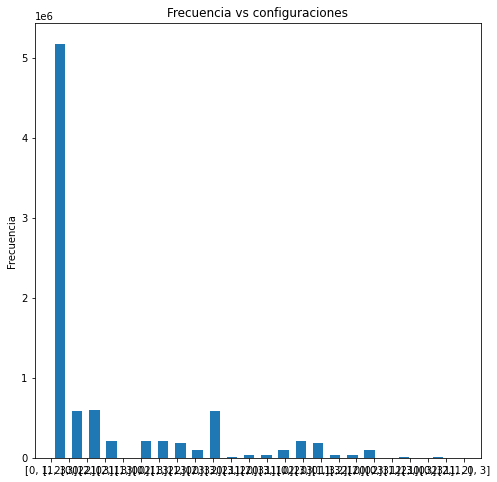

In [8]:
entropia('Imágenes/Astronomía/4.jpg')

In [9]:
def entropia(q): #Con matplotlib

    #Obtención matrices de color

    img2 = plt.imread(q) #Lee la imágen en matrices de capas de colores

    c = np.shape(img2)

    g = list(img2[:,:,0]) #Capa verde
    r = list(img2[:,:,1]) #Capa roja
    b = list(img2[:,:,2]) #Capa azul

    #Divide una matriz de color en matrices 2x2

    lis = [] #Contiene números que conformarían matrices 2x2

    a = g

    for row in range(int(c[0])-1):

        if row%2 == 0: #Evita sobrelapamiento

            for column in range(int(c[1])-1):

                if column%2 == 0: #Evita sobrelapamiento

                    lista = [a[row][column],a[row][column+1],a[row+1][column],a[row+1][column+1]] #convierte en lista con info de matriz

                    lis.append(lista)

    #Cuenta con diccionarios

    conteos={'{}'.format([0,1,2,3]):0,'{}'.format([0,3,2,1]):0,'{}'.format([0,2,1,3]):0,'{}'.format([0,1,3,2]):0,
             '{}'.format([0,3,1,2]):0,'{}'.format([0,2,3,1]):0,'{}'.format([1,0,2,3]):0,'{}'.format([1,0,3,2]):0,
             '{}'.format([1,2,0,3]):0,'{}'.format([1,2,3,0]):0,'{}'.format([1,3,0,2]):0,'{}'.format([1,3,2,0]):0,
             '{}'.format([2,0,1,3]):0,'{}'.format([2,0,3,1]):0,'{}'.format([2,1,0,3]):0,'{}'.format([2,1,3,0]):0,
             '{}'.format([2,3,1,0]):0,'{}'.format([2,3,0,1]):0,'{}'.format([3,0,1,2]):0,'{}'.format([3,0,2,1]):0,
             '{}'.format([3,1,0,2]):0,'{}'.format([3,1,2,0]):0,'{}'.format([3,2,1,0]):0,'{}'.format([3,2,0,1]):0}

    for i in range(len(lis)):

        k = lis[i]

        pos = list(np.argsort(k)) #Organiza índices

        lis[i] = '{}'.format(pos)

        conteos[lis[i]] += 1

    conteo = list(conteos.values())

    print(conteo)

    x = np.arange(24)

    plt.figure(figsize=(8,8))

    plt.bar(x, height=conteo)
    plt.xticks(x, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
    plt.ylabel('Frecuencia')
    plt.xlabel('Permutación')
    plt.title('Frecuencia vs Permutaciones')
    plt.savefig('Histograma.png')

    #Calcula entropía

    entro = 0

    for i in conteo:

        if i != 0:

            entro += (i/len(lis))*np.log(1/(i/len(lis)))

    print('\n La entropía de', q,'es:', entro/np.log(24))
    
    return entro/np.log(24)

[5179188, 602, 597397, 213327, 6742, 213811, 212539, 96386, 6566, 183035, 584908, 31237, 213013, 97197, 577, 2275, 35225, 580450, 182178, 2175, 30987, 93371, 14232, 34850]

 La entropía de Imágenes/Astronomía/4.jpg es: 0.5184257204732806


0.5184257204732806

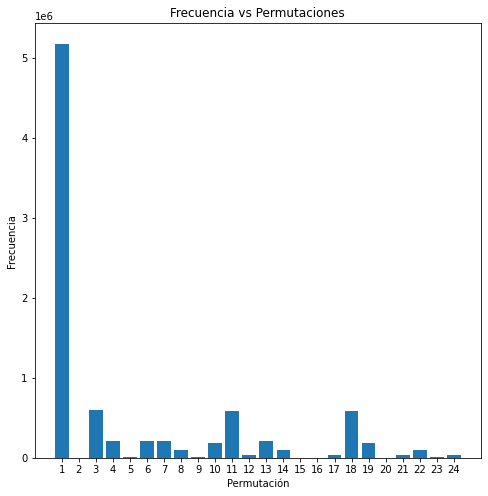

In [10]:
entropia('Imágenes/Astronomía/4.jpg')

In [4]:
#¿Cómo hacer lucir mejor la componente x del histograma?

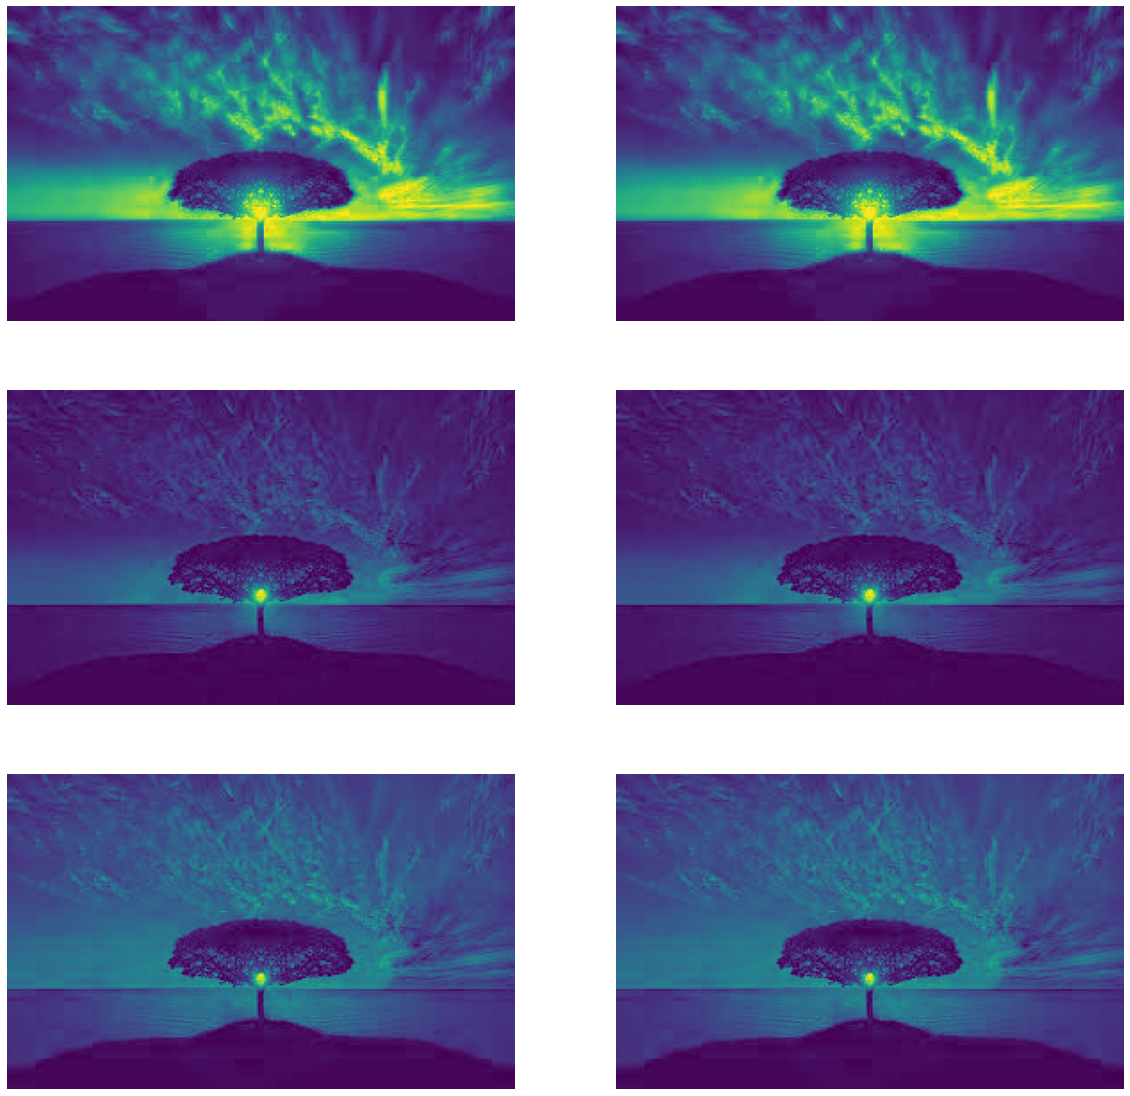

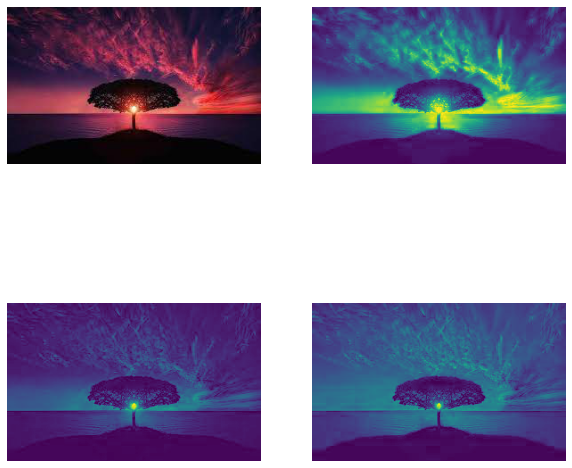

In [10]:
#Comparación con método anterior de obtención de matrices de colores

img = Image.open('descarga.jpg')

pixels = img.load()

r = np.zeros((img.size[1],img.size[0]))
g = np.zeros((img.size[1],img.size[0]))
b = np.zeros((img.size[1],img.size[0]))

for row in range(img.size[1]):
               
    for column in range(img.size[0]):
        
        lr = [pixels[column,row][0]]
        lg = [pixels[column,row][1]]
        lb = [pixels[column,row][2]]
        
        r[row,column] = np.double(lr)
        g[row,column] = np.double(lg)
        b[row,column] = np.double(lb)

img2 = plt.imread('descarga.jpg')
                
plt.figure(figsize=(20,20))
    
plt.subplot(3,2,1)
plt.imshow(img2[:,:,0])
plt.axis('off')
plt.subplot(3,2,2)
plt.imshow(r)
plt.axis('off')
plt.subplot(3,2,3)
plt.imshow(img2[:,:,1])
plt.axis('off')
plt.subplot(3,2,4)
plt.imshow(g)
plt.axis('off')
plt.subplot(3,2,5)
plt.imshow(img2[:,:,2])
plt.axis('off')
plt.subplot(3,2,6)
plt.imshow(b)
plt.axis('off')

img2 = plt.imread('descarga.jpg') #Lee la imagen

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img2)
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(img2[:,:,0]) #Capa de color G 
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(img2[:,:,1]) #Capa de color R
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(img2[:,:,2]) #Capa de color B
plt.axis('off')

plt.savefig('Capas_color.jpg')

In [6]:
# recompilar imágenes: imágenes similares al artículo original (para verificar) x10
# imágenes de biofísica x5
# astrofísica x10
# microscopía de barrido 
# Rostros 

#Divergencia de ------- 
#Qué tan diferente es mi imagen de una imagen de ruido. Comparar con dos distribuciones